In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,average_precision_score,mean_absolute_error,label_ranking_average_precision_score,f1_score,r2_score,accuracy_score,average_precision_score,precision_recall_curve,PrecisionRecallDisplay
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.callbacks import  ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

In [2]:
def collecting_image(path):
    X=[]
    Y=[]
    for i in os.listdir(path):
        for j in os.listdir(path+'/'+i):
            img=cv2.imread(path+"/"+i+'/'+j,cv2.IMREAD_GRAYSCALE)
            img=cv2.resize(img,(578, 290,))
            print(img.shape)
            X.append(img)
            Y.append(i)
    X=np.array(X)
    Y=np.array(Y)
    print(X.shape)
    # df=pd.DataFrame(X,Y)
    # df=df.sample(frac=1,random_state=1).reset_index()
    # df.columns=['Label','Image']
    return X,Y

In [3]:
X,Y=collecting_image("Crop2")

(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)
(290, 578)

(256, 256, 3)


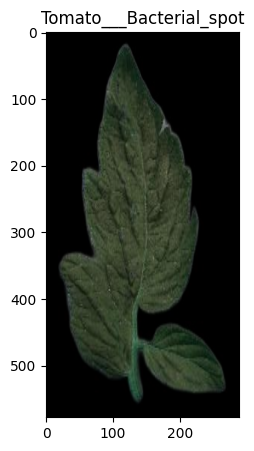

(256, 256, 3)


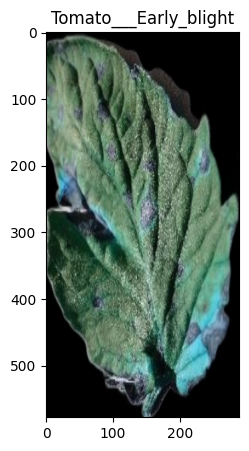

(256, 256, 3)


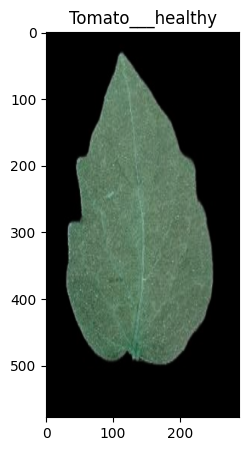

(256, 256, 3)


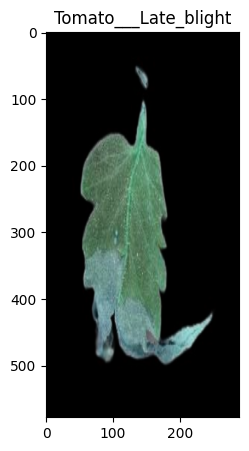

(256, 256, 3)


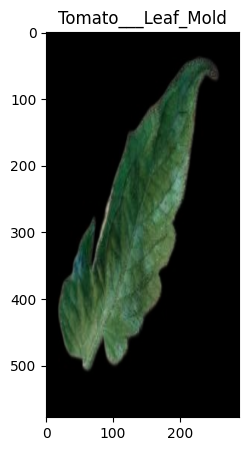

(256, 256, 3)


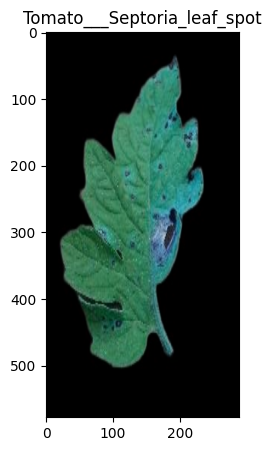

(256, 256, 3)


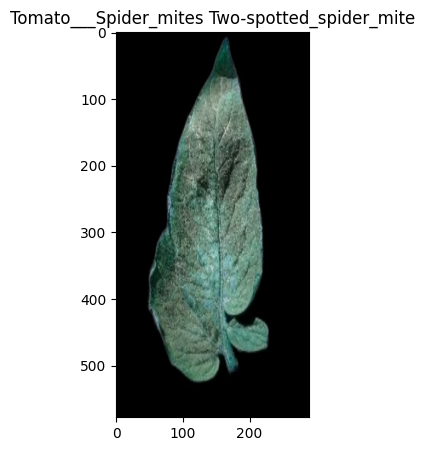

(256, 256, 3)


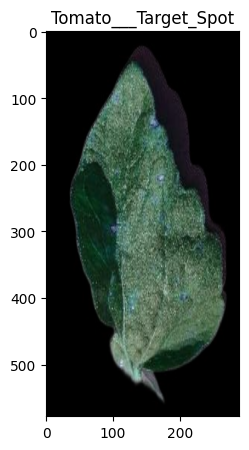

(256, 256, 3)


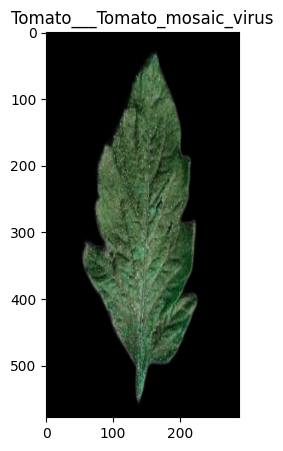

(256, 256, 3)


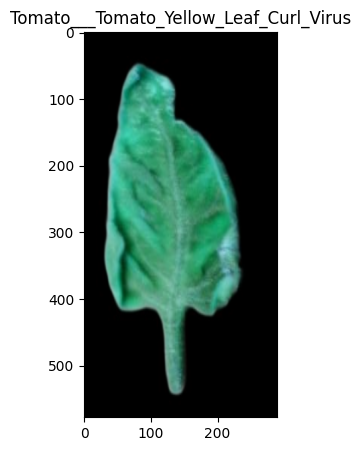

In [4]:
path="Crop2"
arr=[]
names=[]
for i in os.listdir(path):
    for j in os.listdir(path+'/'+i):
        img=cv2.imread(path+"/"+i+'/'+j)
        print(img.shape)
        fig=plt.figure(figsize=(10,5))
        img=cv2.resize(img,(290,578))
        arr.append(img)
        plt.imshow(img)
        names.append(i)
        plt.title(i)
        plt.show()
        break

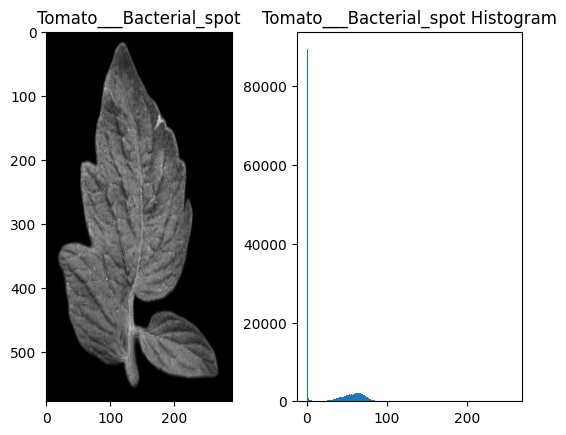

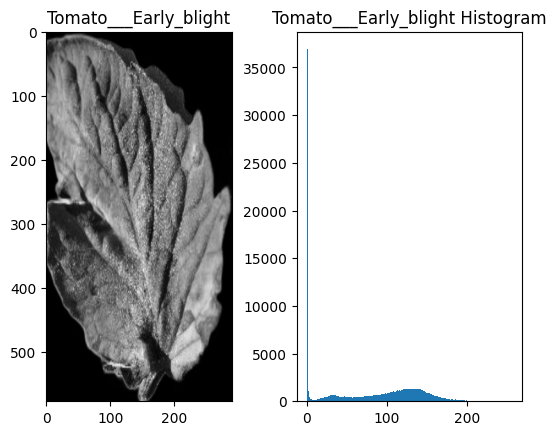

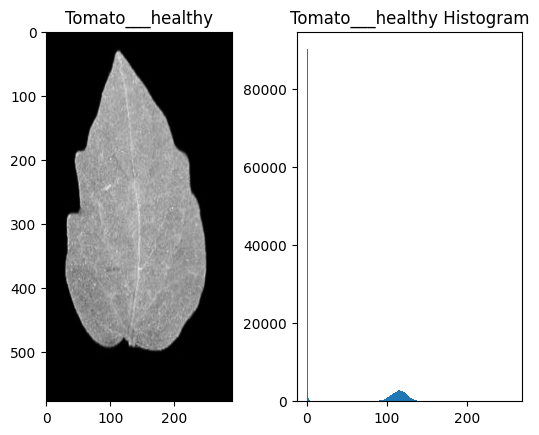

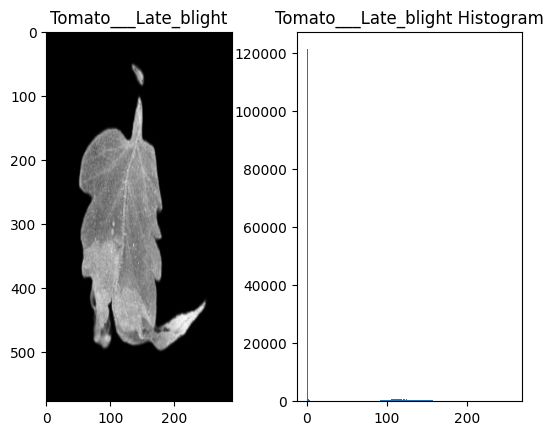

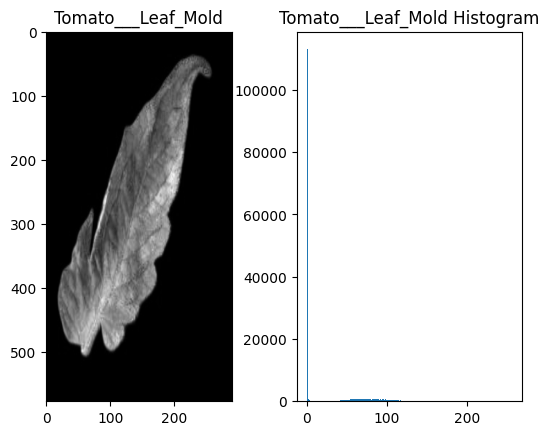

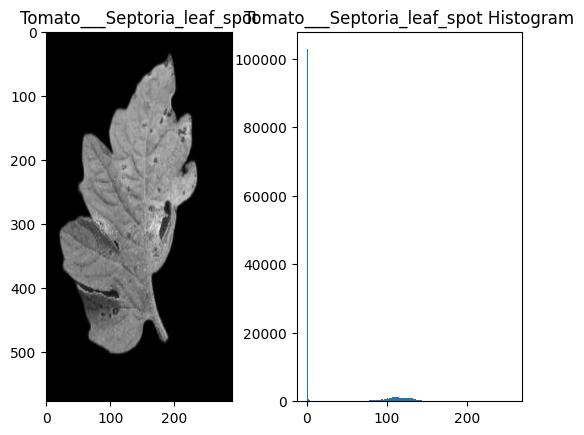

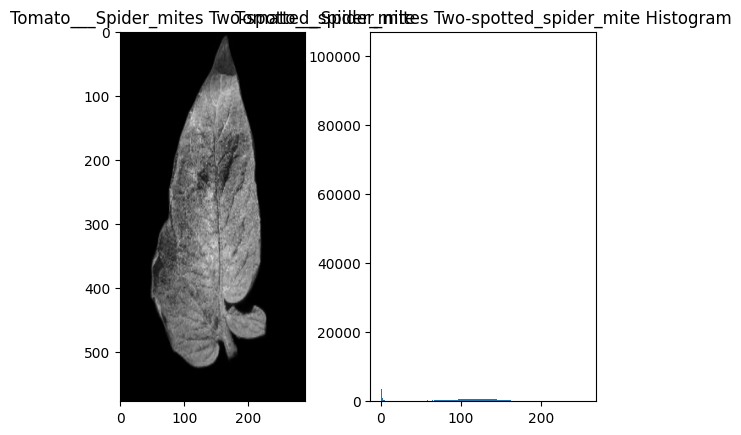

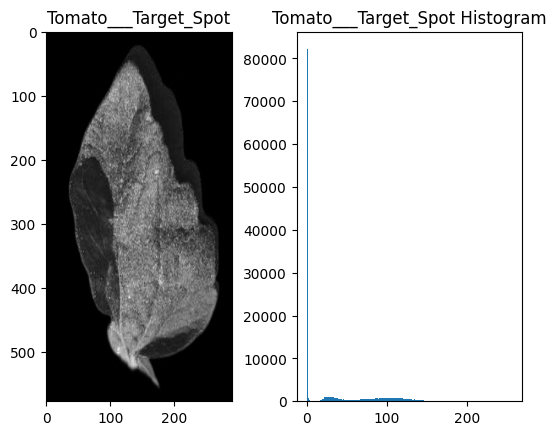

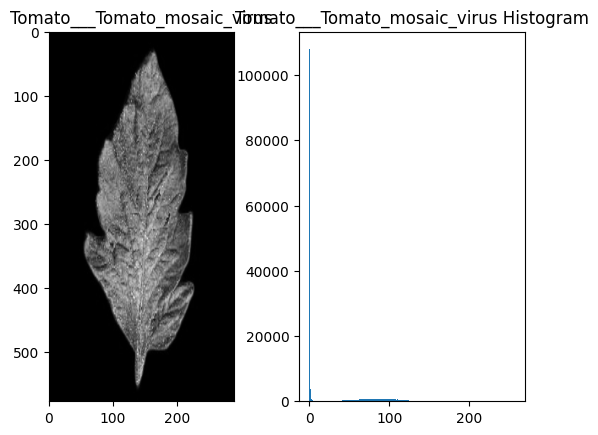

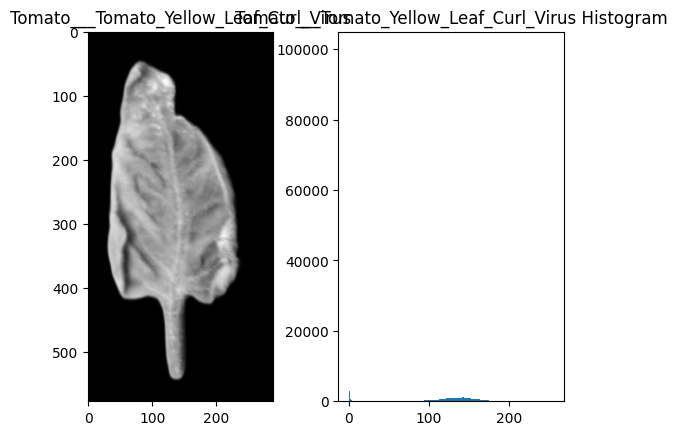

In [5]:
for i,j in zip(arr,names):
    fig,ax=plt.subplots(1,2)
    i=cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    ax[0].imshow(i,'gray')
    ax[1].hist(i.ravel(),256,[0,256])
    ax[0].set_title(j)
    ax[1].set_title(j+" Histogram")
    plt.show()

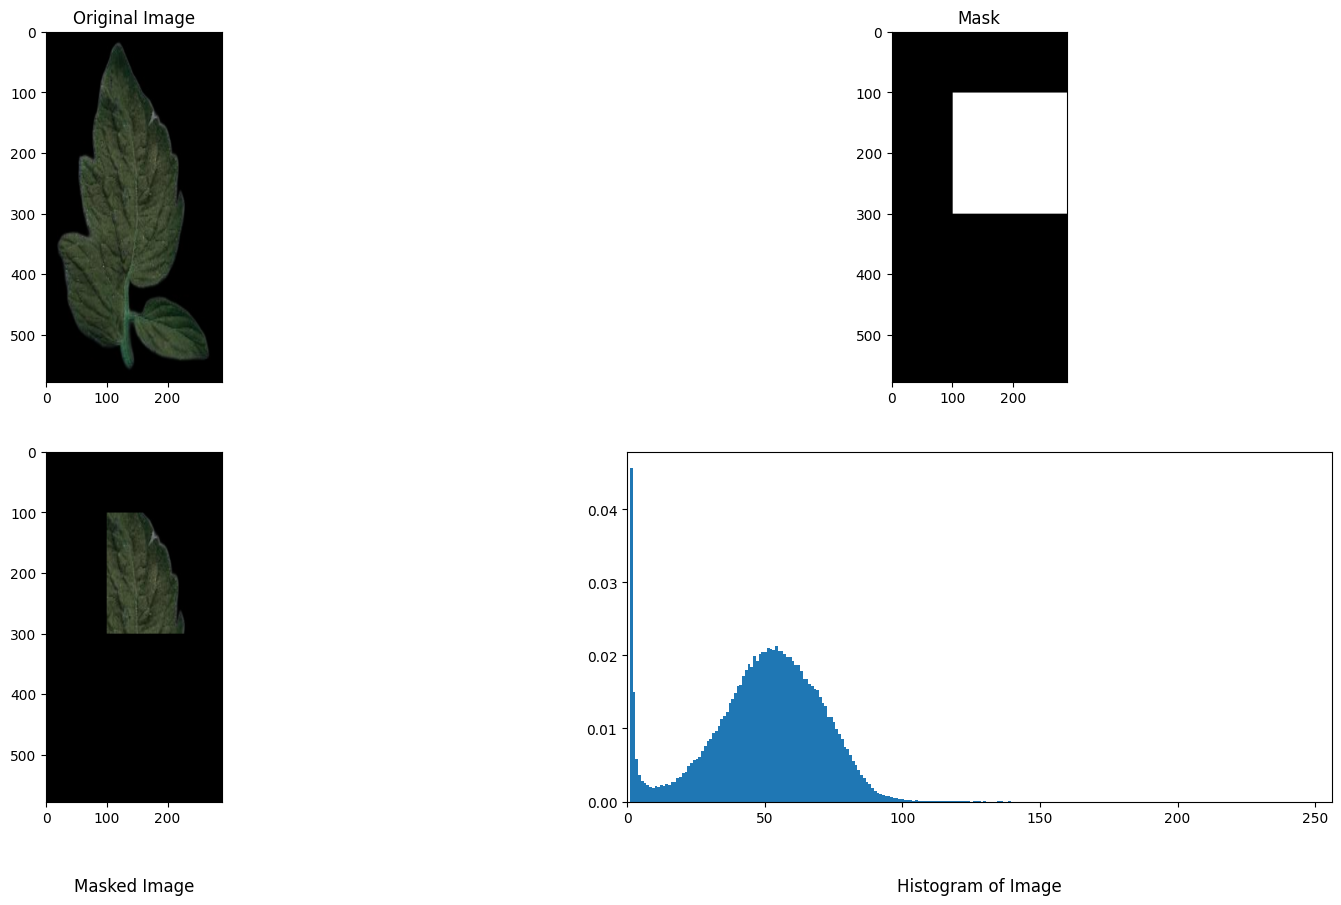

In [6]:
mask = np.zeros(arr[0].shape[:2], np.uint8)
mask[100:300, 100:400] = 255

masked_img = cv2.bitwise_and(arr[0],arr[0],mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
# hist_full = cv2.calcHist([k],[0],None,256,[1,256])
# hist_mask = cv2.calcHist([k],[0],mask,256,[1,256])

plt.figure(figsize=(20,10))
plt.subplot(221), plt.imshow(arr[0],'gray')
plt.title('Original Image')

plt.subplot(222), plt.imshow(mask,'gray')
plt.title('Mask')

plt.subplot(223), plt.imshow(masked_img,'gray')
plt.title('Masked Image',y=-0.2, pad=-14)

plt.subplot(224), plt.hist(arr[0].ravel(),256,[1,256],'gray')
plt.title('Histogram of Image',y=-0.2, pad=-14)
plt.xlim([0,256])
plt.show()

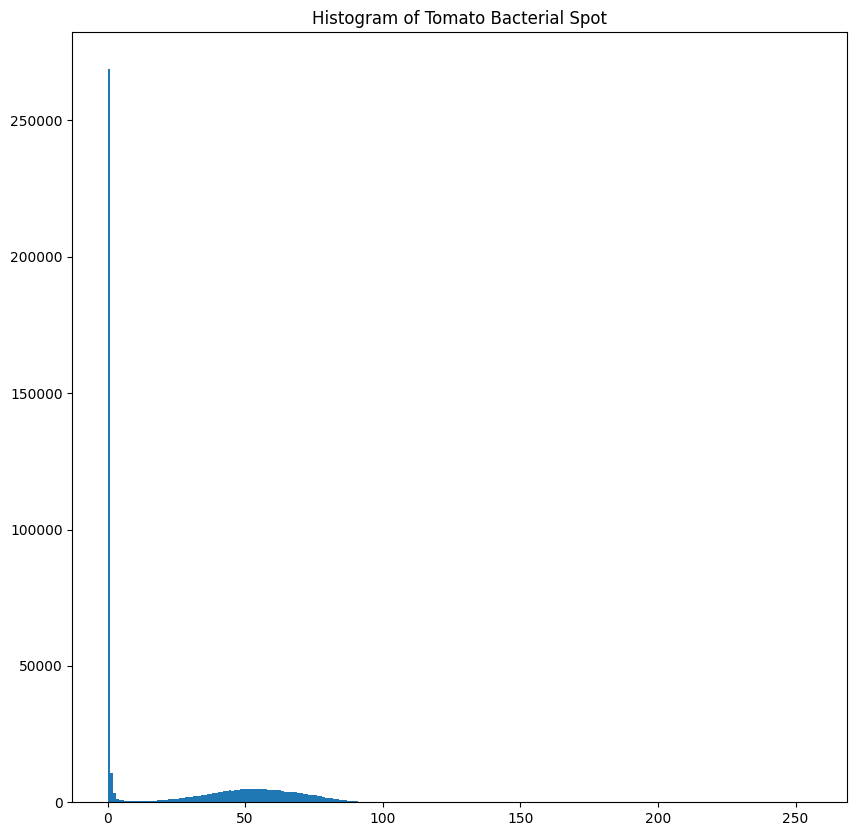

In [7]:
plt.figure(figsize=(10,10))
# hist,bins = np.histogram(k.ravel(),1,[0,10])
plt.hist(arr[0].ravel(),256,[0,256])
plt.title("Histogram of Tomato Bacterial Spot")
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True)

In [2]:
import tensorflow
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional,SimpleRNN,InputLayer,BatchNormalization,MaxPool2D
from tensorflow.keras.optimizers import SGD
from keras.layers import Input

In [8]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 20

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Crop2",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1001 files belonging to 10 classes.


In [10]:
class_names = dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

(32, 256, 256, 3)
[6 4 6 5 2 3 6 1 0 3 9 1 4 7 8 6 9 3 3 1 6 9 4 4 1 8 6 4 6 5 1 7]


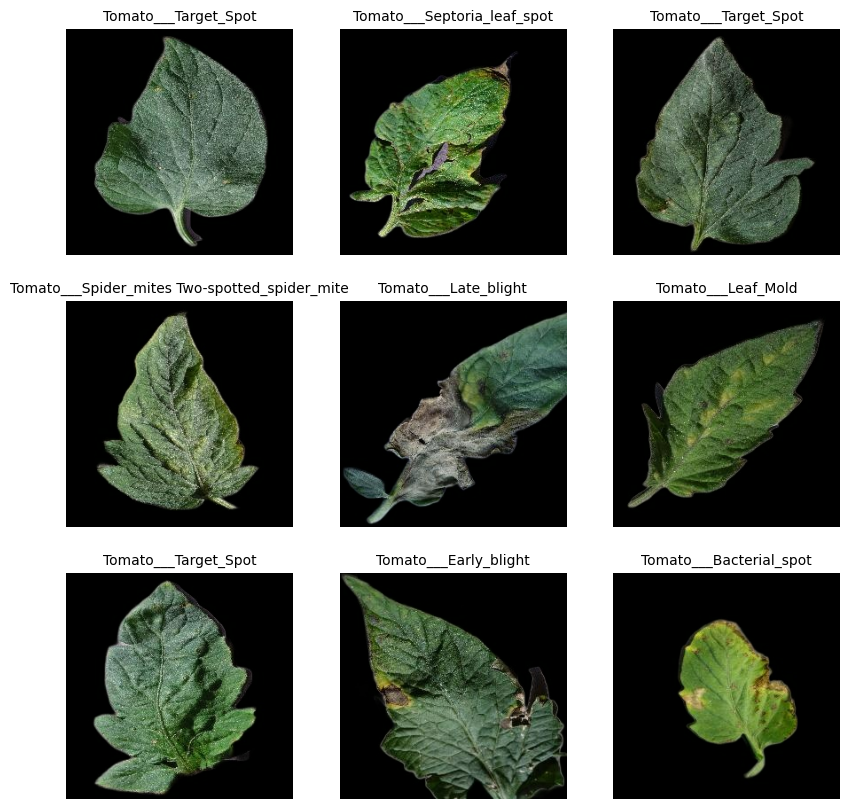

In [11]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(0,9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]],fontsize = 10)
        plt.axis("off")

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.9, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train_ds = ds.take(train_size)    
    test_ds = ds.skip(test_size)
    
    return train_ds, test_ds

In [13]:
train_ds, test_ds = get_dataset_partitions_tf(dataset)

In [26]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2)
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

In [18]:
[((x_train), y_train)] = train_ds.take(1)
[((x_test), y_test)] = test_ds.take(1)
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [20]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
y_test

array([6, 0, 7, 4, 4, 6, 5, 4, 2, 0, 7, 8, 3, 4, 5, 8, 9, 9, 3, 8, 6, 8,
       5, 6, 6, 3, 8, 0, 0, 3, 5, 8])

In [29]:
from tensorflow.keras.applications import VGG16
import cv2

In [30]:
MODELS = {
	"vgg16": VGG16(include_top=False, input_shape=(256, 256, 3), weights='imagenet'),
	# "vgg19": VGG19(),
	# "inception": InceptionV3(),
	# "xception": Xception(), # TensorFlow ONLY
	# "resnet": ResNet50()
}

In [23]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>




Epoch 1: val_loss improved from inf to 1.79115, saving model to vgg16.h5

Epoch 2: val_loss improved from 1.79115 to 1.65296, saving model to vgg16.h5

Epoch 3: val_loss improved from 1.65296 to 1.08379, saving model to vgg16.h5

Epoch 4: val_loss improved from 1.08379 to 0.97548, saving model to vgg16.h5

Epoch 5: val_loss improved from 0.97548 to 0.71749, saving model to vgg16.h5

Epoch 6: val_loss improved from 0.71749 to 0.69933, saving model to vgg16.h5

Epoch 7: val_loss improved from 0.69933 to 0.50095, saving model to vgg16.h5

Epoch 8: val_loss improved from 0.50095 to 0.25402, saving model to vgg16.h5

Epoch 9: val_loss improved from 0.25402 to 0.21246, saving model to vgg16.h5

Epoch 10: val_loss did not improve from 0.21246

Epoch 11: val_loss improved from 0.21246 to 0.19018, saving model to vgg16.h5

Epoch 12: val_loss improved from 0.19018 to 0.13364, saving model to vgg16.h5

Epoch 13: val_loss did not improve from 0.13364

Epoch 14: val_loss did not improve from 0.1

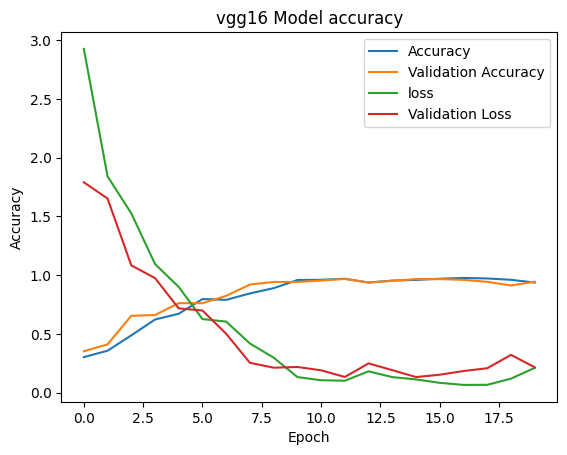

Training Accuracy:  0.9709821343421936
Testing Accuracy:  0.9447513818740845


In [34]:
from keras.models import Model

for model_name in MODELS:
    conv_base=MODELS[model_name]

    top_model = conv_base.output
    top_model = Flatten(name="flat")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    checkpoint = ModelCheckpoint(model_name+'.h5', 
        verbose=1, 
        monitor='val_loss',
        save_best_only=True, 
        mode='auto'
    )  
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

    hist = model.fit(
        train_ds,
        validation_data=test_ds,
        batch_size=BATCH_SIZE,
        callbacks=[checkpoint],
        verbose=False,
        epochs=EPOCHS
    )
    
    plot_model(hist,model_name+' Model')
    # plot_confusionmatrix(model,y_test)

    _, train_acc = model.evaluate(train_ds, verbose=0)
    _, test_acc = model.evaluate(test_ds, verbose=0)
    print("Training Accuracy: ",train_acc)
    print("Testing Accuracy: ",test_acc)

In [ ]:
model.save("model1.keras")

In [ ]:
model.save("crop_prediction_model.h5")